In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
airlinesDf = pd.read_csv("airlines.csv")

In [3]:
airportsDf = pd.read_csv("airports.csv")

In [4]:
flightsDf= pd.read_csv("flights.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19328\17542411.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flightsDf= pd.read_csv("flights.csv")


In [5]:
flightsDf['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

In [6]:
tempmerge = pd.merge(flightsDf,airlinesDf, left_on= 'AIRLINE',right_on='IATA_CODE')

In [7]:
tempmerge2 = pd.merge(tempmerge,airportsDf,left_on='ORIGIN_AIRPORT',right_on= 'IATA_CODE')

In [8]:
df = pd.merge(tempmerge2,airportsDf,left_on='DESTINATION_AIRPORT',right_on= 'IATA_CODE')

In [9]:
df.rename(columns={'CITY_x': 'ORIGIN_CITY','AIRLINE_x':'AIRLINE','STATE_x':'ORIGIN_STATE',
'LATITUDE_x':'ORIGIN_LATITUDE','LONGITUDE_x':'ORIGIN_LONGITUDE','CITY_y': 'DESTINATION_CITY',
'STATE_y':'DESTINATION_STATE','LATITUDE_y':'DESTINATION_LATITUDE',
'LONGITUDE_y':'DESTINATION_LONGITUDE'},inplace=True)

In [10]:
df["DATE"] = df['DAY'].astype(str) +"-"+ df["MONTH"].astype(str) + "-" + df['YEAR'].astype(str)


In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19328\2541906660.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE'] = pd.to_datetime(df['DATE'])


In [12]:
df.drop(['DAY','MONTH','YEAR','DAY_OF_WEEK','IATA_CODE_x','TAIL_NUMBER','IATA_CODE_y','IATA_CODE','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY',
'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIRLINE_y','AIRPORT_x','AIRPORT_y','COUNTRY_y','COUNTRY_x'],axis=1,inplace=True)

In [13]:
# import pandas as pd
# import numpy as np

# d1 = {'Name': ['Pankaj', 'Meghna', 'David', pd.NaT], 'ID': [1, 2, pd.NaT, pd.NaT], 'Salary': [100, 200, np.nan, pd.NaT],
#       'Role': [np.nan, np.nan, pd.NaT, pd.NaT]}

# df = pd.DataFrame(d1)

# print(df)

# df1 = df.dropna(thresh=1)
# print(df1)

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing 

AIRLINE                  0.000000
FLIGHT_NUMBER            0.000000
ORIGIN_AIRPORT           0.000000
DESTINATION_AIRPORT      0.000000
SCHEDULED_DEPARTURE      0.000000
DEPARTURE_TIME           1.571636
DEPARTURE_DELAY          1.571636
TAXI_OUT                 1.624103
WHEELS_OFF               1.624103
SCHEDULED_TIME           0.000113
ELAPSED_TIME             1.908600
AIR_TIME                 1.908600
DISTANCE                 0.000000
WHEELS_ON                1.686545
TAXI_IN                  1.686545
SCHEDULED_ARRIVAL        0.000000
ARRIVAL_TIME             1.686545
ARRIVAL_DELAY            1.908600
DIVERTED                 0.000000
CANCELLED                0.000000
ORIGIN_CITY              0.000000
ORIGIN_STATE             0.000000
ORIGIN_LATITUDE          0.086351
ORIGIN_LONGITUDE         0.086351
DESTINATION_CITY         0.000000
DESTINATION_STATE        0.000000
DESTINATION_LATITUDE     0.086444
DESTINATION_LONGITUDE    0.086444
DATE                     0.000000
dtype: float64

In [15]:
# from math import radians, cos, sin, asin, sqrt
# def distance(lat1, lat2, lon1, lon2):
     
#     # The math module contains a function named
#     # radians which converts from degrees to radians.
#     lon1 = radians(lon1)
#     lon2 = radians(lon2)
#     lat1 = radians(lat1)
#     lat2 = radians(lat2)
      
#     # Haversine formula
#     dlon = lon2 - lon1
#     dlat = lat2 - lat1
#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
#     c = 2 * asin(sqrt(a))
    
#     # Radius of earth in kilometers. Use 3956 for miles
#     r = 6371
      
#     # calculate the result
#     return(c * r)

# lat1 = 61.17432
# lat2 = 47.44898
# lon1 = -149.99619
# lon2 =  -122.30931
# print(distance(lat1, lat2, lon1, lon2), "K.M")

In [16]:
df.columns

Index(['AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_CITY',
       'DESTINATION_STATE', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE',
       'DATE'],
      dtype='object')

In [17]:
df = df.dropna(thresh=25)

In [18]:
df.shape

(5242951, 29)

In [19]:
df.shape#5222000

(5242951, 29)

In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing 

AIRLINE                  0.000000
FLIGHT_NUMBER            0.000000
ORIGIN_AIRPORT           0.000000
DESTINATION_AIRPORT      0.000000
SCHEDULED_DEPARTURE      0.000000
DEPARTURE_TIME           0.000000
DEPARTURE_DELAY          0.000000
TAXI_OUT                 0.000000
WHEELS_OFF               0.000000
SCHEDULED_TIME           0.000000
ELAPSED_TIME             0.225465
AIR_TIME                 0.225465
DISTANCE                 0.000000
WHEELS_ON                0.000000
TAXI_IN                  0.000000
SCHEDULED_ARRIVAL        0.000000
ARRIVAL_TIME             0.000000
ARRIVAL_DELAY            0.225465
DIVERTED                 0.000000
CANCELLED                0.000000
ORIGIN_CITY              0.000000
ORIGIN_STATE             0.000000
ORIGIN_LATITUDE          0.086993
ORIGIN_LONGITUDE         0.086993
DESTINATION_CITY         0.000000
DESTINATION_STATE        0.000000
DESTINATION_LATITUDE     0.087146
DESTINATION_LONGITUDE    0.087146
DATE                     0.000000
dtype: float64

In [ ]:
# x_train = df.loc[df['DEPARTURE_TIME'].notnull()]
# x_test = df.loc[df['DEPARTURE_TIME'].isnull()]

# x_train = x_train.select_dtypes(exclude=['object','datetime64[ns]'])
# x_train = x_train.drop(['DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME',
# 'ARRIVAL_DELAY','ORIGIN_LATITUDE','ORIGIN_LONGITUDE','DESTINATION_LATITUDE','DESTINATION_LONGITUDE','DEPARTURE_TIME'],axis=1).copy()

# x_test = x_test.select_dtypes(exclude=['object','datetime64[ns]'])
# x_test = x_test.drop(['DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME',
# 'ARRIVAL_DELAY','ORIGIN_LATITUDE','ORIGIN_LONGITUDE','DESTINATION_LATITUDE','DESTINATION_LONGITUDE','DEPARTURE_TIME'],axis=1).copy()


# y_train = df.loc[df['DEPARTURE_TIME'].notnull()]
# y_test = df.loc[df['DEPARTURE_TIME'].isnull()]

# y_train = y_train[['DEPARTURE_TIME']]
# y_test = y_test[['DEPARTURE_TIME']]


# model = LinearRegression()
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)

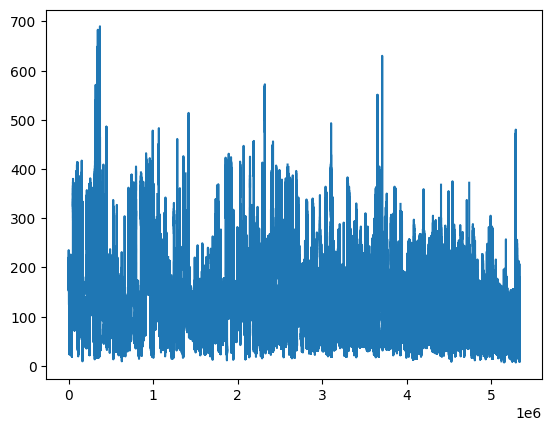

In [ ]:
plt.plot(df['AIR_TIME'])